# 1. Load the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('White goods fires from 2009.csv')  # read the dataset

num_rows = df.shape[0]
print(f'The number of rows in the dataset is: {num_rows}')

The number of rows in the dataset is: 4727


In [6]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4727 entries, 0 to 4726
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Year                        4727 non-null   int64 
 1   Month                       4727 non-null   object
 2   IncType                     4727 non-null   object
 3   ParentPropertyType          4727 non-null   object
 4   NumFireDeaths               4727 non-null   int64 
 5   NumAllFireInjuries          4727 non-null   int64 
 6   IncGeo_BoroughCode          4727 non-null   object
 7   IncGeo_BoroughName          4727 non-null   object
 8   IncGeo_WardCode             4726 non-null   object
 9   IncGeo_WardName             4726 non-null   object
 10  IgnitionSourcePower         4727 non-null   object
 11  IgnitionSource              4727 non-null   object
 12  ItemFirstIgnited            4577 non-null   object
 13  LocationFireStarted         4727 non-null   obje

In [7]:
# Display summary statistics
print(df.describe())

              Year  NumFireDeaths  NumAllFireInjuries
count  4727.000000    4727.000000         4727.000000
mean   2015.849164       0.017982            0.143008
std       4.266648       1.037334            1.694214
min    2009.000000       0.000000            0.000000
25%    2012.000000       0.000000            0.000000
50%    2016.000000       0.000000            0.000000
75%    2019.000000       0.000000            0.000000
max    2024.000000      71.000000          109.000000


# 2. Check for null values

In [8]:
# Check for missing values
print(df.isnull().sum())

Year                             0
Month                            0
IncType                          0
ParentPropertyType               0
NumFireDeaths                    0
NumAllFireInjuries               0
IncGeo_BoroughCode               0
IncGeo_BoroughName               0
IncGeo_WardCode                  1
IncGeo_WardName                  1
IgnitionSourcePower              0
IgnitionSource                   0
ItemFirstIgnited               150
LocationFireStarted              0
ApplianceManufacturer          526
ApplianceManufacturerOther    4177
MainCauseModel                 598
dtype: int64


# 3. Check for duplicate record

In [9]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Display duplicate rows, if any
print("Duplicate Rows except first occurrence:")
print(duplicate_rows)

Duplicate Rows except first occurrence:
     Year Month       IncType ParentPropertyType  NumFireDeaths  \
293  2009  July  Primary Fire   Residential Home              0   

     NumAllFireInjuries IncGeo_BoroughCode IncGeo_BoroughName IncGeo_WardCode  \
293                   0          E09000003             Barnet       E05013634   

    IncGeo_WardName IgnitionSourcePower IgnitionSource   ItemFirstIgnited  \
293     Cricklewood         Electricity     Dishwasher  Internal Fittings   

    LocationFireStarted ApplianceManufacturer ApplianceManufacturerOther  \
293             Kitchen               INDESIT                        NaN   

    MainCauseModel  
293            530  


In [10]:
# Remove duplicate rows
df = df.drop_duplicates()

num_rows = df.shape[0]
print(f'The number of rows in the dataset is: {num_rows}')

The number of rows in the dataset is: 4726


In [11]:
# Read first five rows
df.head()

,Year,Month,IncType,ParentPropertyType,NumFireDeaths,NumAllFireInjuries,IncGeo_BoroughCode,IncGeo_BoroughName,IncGeo_WardCode,IncGeo_WardName,IgnitionSourcePower,IgnitionSource,ItemFirstIgnited,LocationFireStarted,ApplianceManufacturer,ApplianceManufacturerOther,MainCauseModel
0,2009,June,Primary Fire,Purpose Built Flats/Maisonettes,0,0,E09000033,Westminster,E05013807,Vincent Square,Electricity,Washing machine,Wiring insulation,Kitchen,HOOVER,NaN,Quattro AS110
1,2009,July,Primary Fire,Purpose Built Flats/Maisonettes,0,0,E09000007,Camden,E05013654,Camden Square,Electricity,Washing machine,Plastic - raw material only,Kitchen,CANDY,NaN,Aquaviva 120T
2,2009,June,Primary Fire,Purpose Built Flats/Maisonettes,0,1,E09000016,Havering,E05013969,Elm Park,Electricity,Fridge/Freezer,Plastic - raw material only,Corridor/Hall,BEJAM,NaN,Fridge Freezer model not known
3,2009,July,Primary Fire,Purpose Built Flats/Maisonettes,0,0,E09000022,Lambeth,E05014113,Streatham Hill East,Electricity,Tumble dryer - Standard,Other textiles,Kitchen,NaN,NaN,NaN
4,2009,July,Primary Fire,Purpose Built Flats/Maisonettes,0,0,E09000007,Camden,E05013660,Haverstock,Electricity,Fridge/Freezer,Other item,Kitchen,BOSCH,NaN,ClassicXX


In [12]:
# Read last fives rows
df.tail()

,Year,Month,IncType,ParentPropertyType,NumFireDeaths,NumAllFireInjuries,IncGeo_BoroughCode,IncGeo_BoroughName,IncGeo_WardCode,IncGeo_WardName,IgnitionSourcePower,IgnitionSource,ItemFirstIgnited,LocationFireStarted,ApplianceManufacturer,ApplianceManufacturerOther,MainCauseModel
4722,2024,January,Primary Fire,Purpose Built Flats/Maisonettes,0,0,E09000027,RICHMOND UPON THAMES,E05013778,HAMPTON,Electricity,Washer/Dryer combined,Clothing,Kitchen,INDESIT,NaN,IWDE126 (UK)
4723,2024,February,Primary Fire,Purpose Built Flats/Maisonettes,0,0,E09000017,HILLINGDON,E05013569,HAYES TOWN,Electricity,Washing machine,Plastic - raw material only,Kitchen,HOTPOINT,NaN,t-200
4724,2024,February,Primary Fire,Purpose Built Flats/Maisonettes,0,0,E09000019,ISLINGTON,E05013697,ARSENAL,Electricity,Dishwasher,Wiring insulation,Kitchen,BOSCH,NaN,Classicxx
4725,2024,January,Primary Fire,Purpose Built Flats/Maisonettes,0,0,E09000007,CAMDEN,E05013669,ST. PANCRAS & SOMERS TOWN,Electricity,Washing machine,Plastic - raw material only,Kitchen,Other,no make visible,unknown
4726,2024,February,Primary Fire,Purpose Built Flats/Maisonettes,0,0,E09000016,HAVERING,E05013980,RUSH GREEN & CROWLANDS,Electricity,Washing machine,NaN,Kitchen,SHARP,NaN,ES-NDIB7141WD


# 4. Data Cleaning

In [13]:
df.drop(columns=['ApplianceManufacturerOther'], inplace=True)

In [14]:
# Read first five rows
df.head()

,Year,Month,IncType,ParentPropertyType,NumFireDeaths,NumAllFireInjuries,IncGeo_BoroughCode,IncGeo_BoroughName,IncGeo_WardCode,IncGeo_WardName,IgnitionSourcePower,IgnitionSource,ItemFirstIgnited,LocationFireStarted,ApplianceManufacturer,MainCauseModel
0,2009,June,Primary Fire,Purpose Built Flats/Maisonettes,0,0,E09000033,Westminster,E05013807,Vincent Square,Electricity,Washing machine,Wiring insulation,Kitchen,HOOVER,Quattro AS110
1,2009,July,Primary Fire,Purpose Built Flats/Maisonettes,0,0,E09000007,Camden,E05013654,Camden Square,Electricity,Washing machine,Plastic - raw material only,Kitchen,CANDY,Aquaviva 120T
2,2009,June,Primary Fire,Purpose Built Flats/Maisonettes,0,1,E09000016,Havering,E05013969,Elm Park,Electricity,Fridge/Freezer,Plastic - raw material only,Corridor/Hall,BEJAM,Fridge Freezer model not known
3,2009,July,Primary Fire,Purpose Built Flats/Maisonettes,0,0,E09000022,Lambeth,E05014113,Streatham Hill East,Electricity,Tumble dryer - Standard,Other textiles,Kitchen,NaN,NaN
4,2009,July,Primary Fire,Purpose Built Flats/Maisonettes,0,0,E09000007,Camden,E05013660,Haverstock,Electricity,Fridge/Freezer,Other item,Kitchen,BOSCH,ClassicXX


In [15]:
# extract a values of Item Ignited First
df['ItemFirstIgnited'].value_counts()

ItemFirstIgnited
Wiring insulation                                 1419
Plastic - raw material only                        910
Internal Fittings                                  506
Other item                                         473
Clothing                                           253
Rubber - raw material only                         162
Not known                                          156
Printed circuit board                              146
Other textiles                                     138
Capacitor                                          128
Unspecified internal fitting/part of structure      98
Foam - raw material only                            44
Other furniture                                     28
Bedding                                             26
Gases                                               16
Other/Unspecified furnishings                       12
Garden shed                                          9
External fittings                               

In [16]:
df['ItemFirstIgnited'].fillna("Not known", inplace=True)

In [17]:
# Check for missing values
print(df.isnull().sum())

Year                       0
Month                      0
IncType                    0
ParentPropertyType         0
NumFireDeaths              0
NumAllFireInjuries         0
IncGeo_BoroughCode         0
IncGeo_BoroughName         0
IncGeo_WardCode            1
IncGeo_WardName            1
IgnitionSourcePower        0
IgnitionSource             0
ItemFirstIgnited           0
LocationFireStarted        0
ApplianceManufacturer    526
MainCauseModel           598
dtype: int64


In [18]:
# extract a list of IncGeo_WardCode
df['IncGeo_WardCode'].value_counts()

IncGeo_WardCode
E05013806    30
E05013808    23
E05014079    20
E05013639    18
E05014028    18
             ..
E05013928     1
E05009306     1
E05013681     1
E05013563     1
E05014025     1
Name: count, Length: 688, dtype: int64

In [19]:
# extract a list of IncGeo_WardCode
df['IncGeo_WardName'].value_counts()

IncGeo_WardName
St. James's                  25
West End                     22
Edgware                      19
Eltham Town & Avery Hill     19
Clapham Town                 17
                             ..
BRUCE CASTLE                  1
KINGSTON TOWN                 1
YIEWSLEY                      1
EAST HAM SOUTH                1
ST. PANCRAS & SOMERS TOWN     1
Name: count, Length: 1061, dtype: int64

In [20]:
df[df['IncGeo_WardCode'].isnull()]

,Year,Month,IncType,ParentPropertyType,NumFireDeaths,NumAllFireInjuries,IncGeo_BoroughCode,IncGeo_BoroughName,IncGeo_WardCode,IncGeo_WardName,IgnitionSourcePower,IgnitionSource,ItemFirstIgnited,LocationFireStarted,ApplianceManufacturer,MainCauseModel
4498,2023,June,Primary Fire,Food and Drink,0,0,E09000025,NEWHAM,NaN,NaN,Electricity,Fridge - Freestanding,Printed circuit board,Kitchen,Other,Unknown


In [21]:
# Drop rows where 'IncGeo_WardName' column is null
df = df.dropna(subset=['IncGeo_WardName'])

In [22]:
# Check for missing values
print(df.isnull().sum())

Year                       0
Month                      0
IncType                    0
ParentPropertyType         0
NumFireDeaths              0
NumAllFireInjuries         0
IncGeo_BoroughCode         0
IncGeo_BoroughName         0
IncGeo_WardCode            0
IncGeo_WardName            0
IgnitionSourcePower        0
IgnitionSource             0
ItemFirstIgnited           0
LocationFireStarted        0
ApplianceManufacturer    526
MainCauseModel           598
dtype: int64


In [23]:
# extract a values of ApplianceManufacturer
df['ApplianceManufacturer'].value_counts()

ApplianceManufacturer
HOTPOINT     804
Other        552
INDESIT      479
BEKO         349
BOSCH        334
            ... 
DUVAL          1
HUSQVARNA      1
PRESTCOLD      1
KOYTO          1
AKAI           1
Name: count, Length: 180, dtype: int64

In [24]:
df['ApplianceManufacturer'].fillna("Other", inplace=True)

In [25]:
# Check for missing values
print(df.isnull().sum())

Year                       0
Month                      0
IncType                    0
ParentPropertyType         0
NumFireDeaths              0
NumAllFireInjuries         0
IncGeo_BoroughCode         0
IncGeo_BoroughName         0
IncGeo_WardCode            0
IncGeo_WardName            0
IgnitionSourcePower        0
IgnitionSource             0
ItemFirstIgnited           0
LocationFireStarted        0
ApplianceManufacturer      0
MainCauseModel           598
dtype: int64


In [26]:
# extract a values of MainCauseModel
df['MainCauseModel'].value_counts()

MainCauseModel
unknown          243
not known        139
Unknown          138
Not known         64
Not Known         58
                ... 
wirepool           1
aaa class          1
Integral unit      1
SGS43CO2           1
ES-NDIB7141WD      1
Name: count, Length: 2822, dtype: int64

In [27]:
df['MainCauseModel'].fillna("Unknown", inplace=True)

In [28]:
# Check for missing values
print(df.isnull().sum())

Year                     0
Month                    0
IncType                  0
ParentPropertyType       0
NumFireDeaths            0
NumAllFireInjuries       0
IncGeo_BoroughCode       0
IncGeo_BoroughName       0
IncGeo_WardCode          0
IncGeo_WardName          0
IgnitionSourcePower      0
IgnitionSource           0
ItemFirstIgnited         0
LocationFireStarted      0
ApplianceManufacturer    0
MainCauseModel           0
dtype: int64


In [29]:
num_rows = df.shape[0]
print(f'The number of rows in the dataset is: {num_rows}')

The number of rows in the dataset is: 4725


In [30]:
# Find maximum and minimum years
max_year = df['Year'].max()
min_year = df['Year'].min()

print("Maximum date:", max_year)
print("Minimum date:", min_year)

Maximum date: 2024
Minimum date: 2009


In [31]:
# extract a values of IncType
df['IncType'].value_counts()

IncType
Primary Fire    4717
Late Call          8
Name: count, dtype: int64

In [32]:
# extract a values of ParentPropertyType
df['ParentPropertyType'].value_counts()

ParentPropertyType
Dwelling                                       2105
Purpose Built Flats/Maisonettes                1373
Converted Flats/Maisonettes                     529
Non Residential                                 144
Retail                                          138
Food and Drink                                   97
House in Multiple Occupation                     74
Residential Home                                 49
Offices and call centres                         45
Other Residential                                40
Education                                        38
Hospitals and medical care                       25
Outdoor structures                               18
Entertainment and culture                        13
Industrial Manufacturing                          7
Sporting venues                                   6
Road Vehicle                                      5
Warehouses and bulk storage                       4
Transport buildings                          

In [33]:
# extract a values of IgnitionSourcePower
df['IgnitionSourcePower'].value_counts()

IgnitionSourcePower
Electricity       4711
Not applicable       5
Unknown              3
Gas - cylinder       3
Other                3
Name: count, dtype: int64

In [34]:
# extract a values of IgnitionSource
df['IgnitionSource'].value_counts()

IgnitionSource
Washing machine                  1568
Tumble dryer - Standard           773
Dishwasher                        622
Tumble dryer - Condensing         399
Washer/Dryer combined             319
Fridge/Freezer - Freestanding     284
Fridge/Freezer                    257
Fridge - Freestanding             156
Freezer - Freestanding            148
Spin dryer                         88
Fridge/Freezer - Integrated        42
Fridge - Integrated                40
Freezer - Integrated               29
Name: count, dtype: int64

In [35]:
# extract a values of ItemFirstIgnited
df['ItemFirstIgnited'].value_counts()

ItemFirstIgnited
Wiring insulation                                 1419
Plastic - raw material only                        910
Internal Fittings                                  506
Other item                                         473
Not known                                          306
Clothing                                           253
Rubber - raw material only                         162
Printed circuit board                              145
Other textiles                                     138
Capacitor                                          128
Unspecified internal fitting/part of structure      98
Foam - raw material only                            44
Other furniture                                     28
Bedding                                             26
Gases                                               16
Other/Unspecified furnishings                       12
Garden shed                                          9
External fittings                               

In [36]:
# extract a values of LocationFireStarted
df['LocationFireStarted'].value_counts()

LocationFireStarted
Kitchen                                  3425
Utility room                              416
Garage                                    122
Other                                     104
Shop floor/Showroom/Display hall           79
External structures                        77
Corridor/Hall                              52
Store room                                 50
Laundry room                               48
Living room                                44
Under stairs (enclosed, storage area)      43
Airing/Drying cupboard                     43
Bedroom                                    42
Conservatory                               41
Bathroom/Toilet                            40
Canteen/Restaurant                         18
Dining room                                14
Process/Production room                    11
Bedsitting room                            10
Meeting room                                8
Office                                      7
Private balcon

In [37]:
# extract a values of ApplianceManufacturer
df['ApplianceManufacturer'].value_counts()

ApplianceManufacturer
Other        1078
HOTPOINT      804
INDESIT       479
BEKO          349
BOSCH         334
             ... 
DUVAL           1
HUSQVARNA       1
PRESTCOLD       1
KOYTO           1
AKAI            1
Name: count, Length: 180, dtype: int64

In [38]:
# extract a values of ApplianceManufacturer
df['MainCauseModel'].value_counts()

MainCauseModel
Unknown          736
unknown          243
not known        139
Not known         64
Not Known         58
                ... 
wirepool           1
aaa class          1
Integral unit      1
SGS43CO2           1
ES-NDIB7141WD      1
Name: count, Length: 2822, dtype: int64

In [39]:
# Convert strings to lowercase and remove spaces
df['MainCauseModel'] = df['MainCauseModel'].str.lower().str.replace(' ', '')

# 5. Data Visualisation

## 1. Number of fire incidents by year

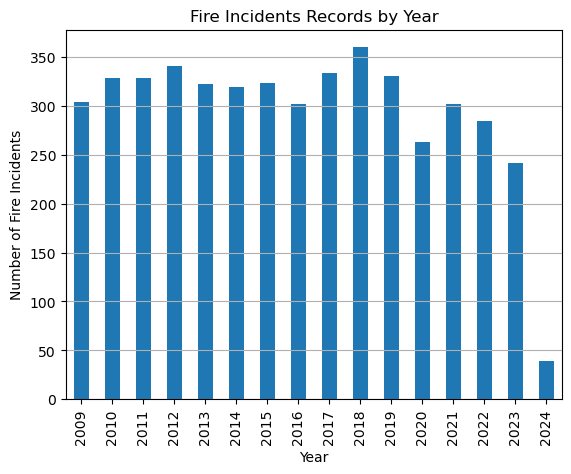

In [40]:
# Counting fire incidents for each year
fire_incidents_count = df['Year'].value_counts().sort_index()

# Plotting the bar chart
fire_incidents_count.plot(kind='bar')
plt.title('Fire Incidents Records by Year')
plt.xlabel('Year')
plt.ylabel('Number of Fire Incidents')
plt.grid(axis='y')  # Show grid lines only on y-axis
plt.show()

## 2. Number of fire incidents by Parent Property Type

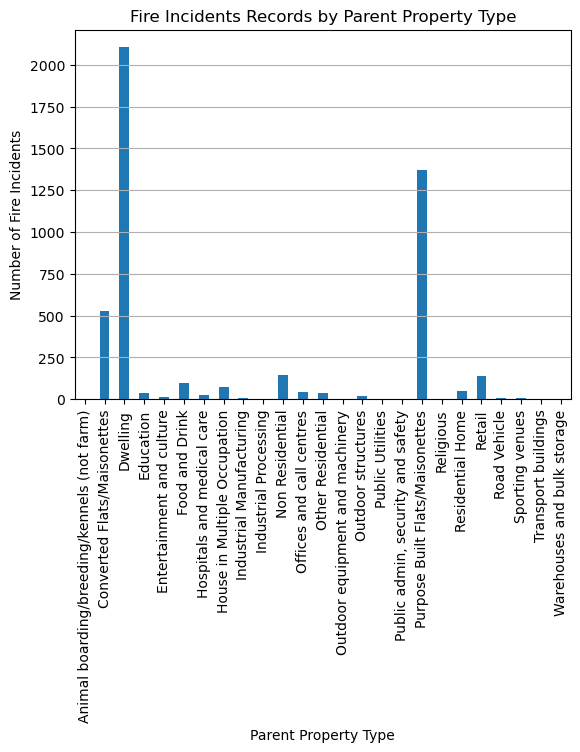

In [41]:
# Counting fire incidents for Parent Property Type
fire_incidents_count = df['ParentPropertyType'].value_counts().sort_index()

# Plotting the bar chart
fire_incidents_count.plot(kind='bar')
plt.title('Fire Incidents Records by Parent Property Type')
plt.xlabel('Parent Property Type')
plt.ylabel('Number of Fire Incidents')
plt.grid(axis='y')  # Show grid lines only on y-axis
plt.show()

## 3. Number of fire incidents by Ignition Source Power

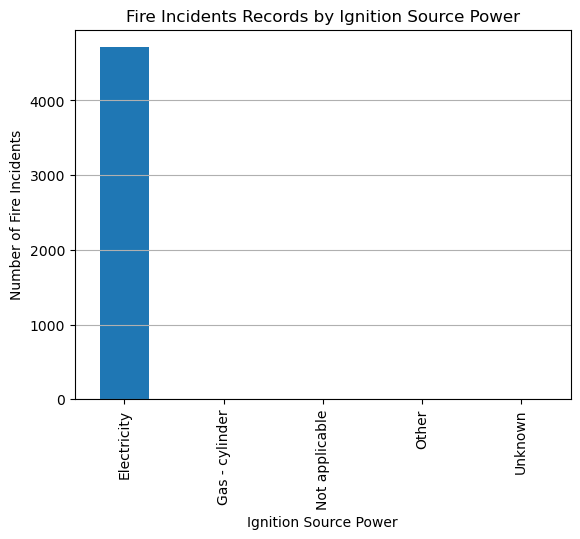

In [42]:
# Counting fire incidents for Ignition Source Power
fire_incidents_count = df['IgnitionSourcePower'].value_counts().sort_index()

# Plotting the bar chart
fire_incidents_count.plot(kind='bar')
plt.title('Fire Incidents Records by Ignition Source Power')
plt.xlabel('Ignition Source Power')
plt.ylabel('Number of Fire Incidents')
plt.grid(axis='y')  # Show grid lines only on y-axis
plt.show()

## 4. Number of fire incidents by Ignition Source

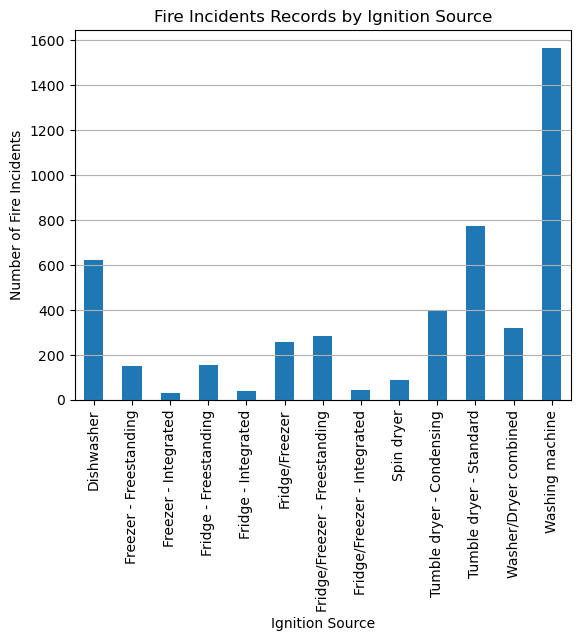

In [43]:
# Counting fire incidents for Ignition Source
fire_incidents_count = df['IgnitionSource'].value_counts().sort_index()

# Plotting the bar chart
fire_incidents_count.plot(kind='bar')
plt.title('Fire Incidents Records by Ignition Source')
plt.xlabel('Ignition Source')
plt.ylabel('Number of Fire Incidents')
plt.grid(axis='y')  # Show grid lines only on y-axis
plt.show()

## 5. Number of fire incidents by Item First Ignited

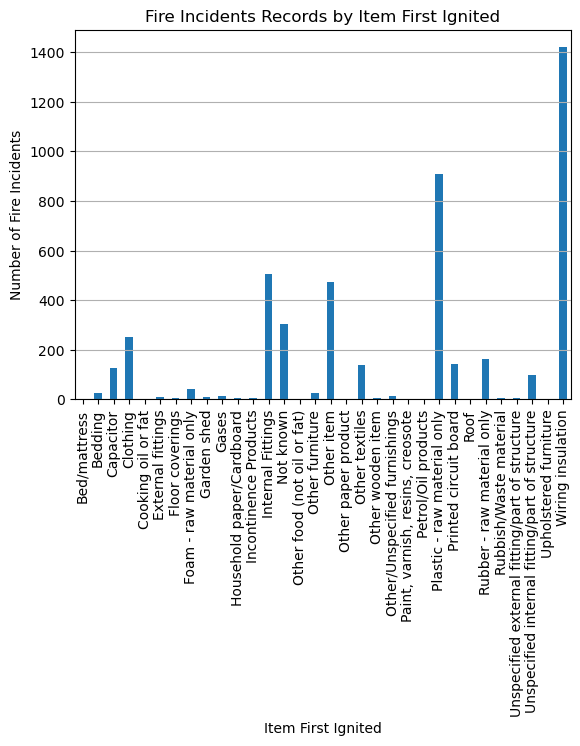

In [44]:
# Counting fire incidents for Item First Ignited
fire_incidents_count = df['ItemFirstIgnited'].value_counts().sort_index()

# Plotting the bar chart
fire_incidents_count.plot(kind='bar')
plt.title('Fire Incidents Records by Item First Ignited')
plt.xlabel('Item First Ignited')
plt.ylabel('Number of Fire Incidents')
plt.grid(axis='y')  # Show grid lines only on y-axis
plt.show()

## 6. Number of fire incidents by Location Fire Started

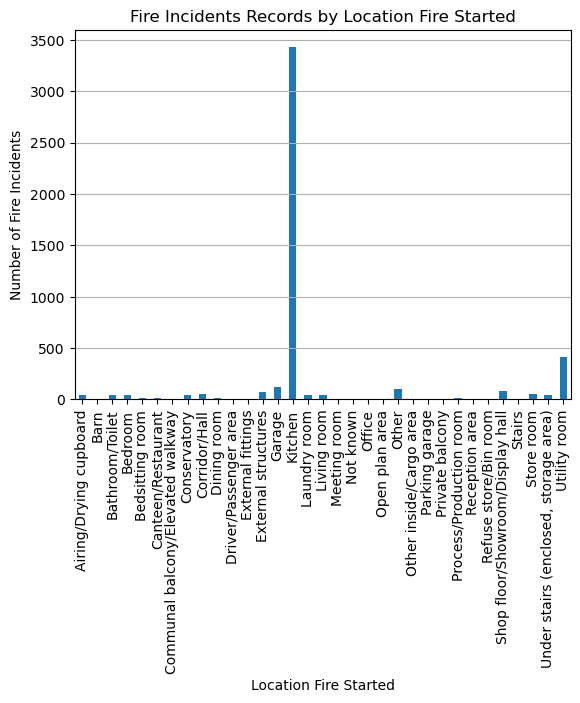

In [45]:
# Counting fire incidents for Location Fire Started
fire_incidents_count = df['LocationFireStarted'].value_counts().sort_index()

# Plotting the bar chart
fire_incidents_count.plot(kind='bar')
plt.title('Fire Incidents Records by Location Fire Started')
plt.xlabel('Location Fire Started')
plt.ylabel('Number of Fire Incidents')
plt.grid(axis='y')  # Show grid lines only on y-axis
plt.show()

## 7. Number of fire incidents by Appliance Manufacturer

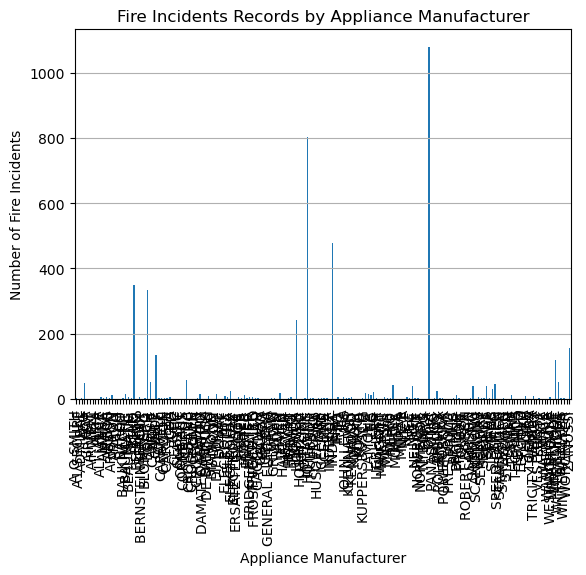

In [46]:
# Counting fire incidents for Appliance Manufacturer
fire_incidents_count = df['ApplianceManufacturer'].value_counts().sort_index()

# Plotting the bar chart
fire_incidents_count.plot(kind='bar')
plt.title('Fire Incidents Records by Appliance Manufacturer')
plt.xlabel('Appliance Manufacturer')
plt.ylabel('Number of Fire Incidents')
plt.grid(axis='y')  # Show grid lines only on y-axis
plt.show()

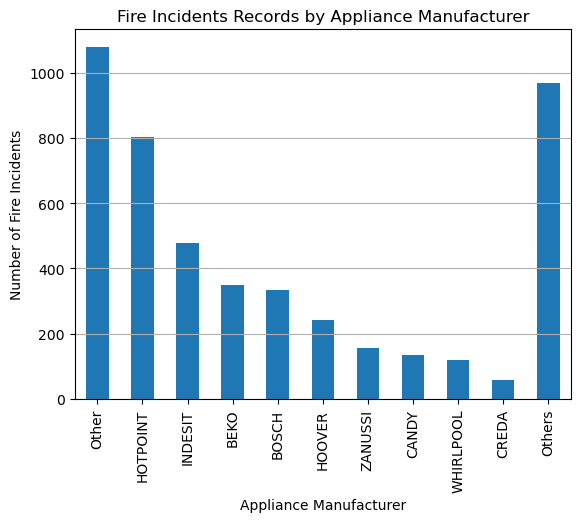

In [47]:
# Counting fire incidents for Appliance Manufacturer
fire_incidents_count = df['ApplianceManufacturer'].value_counts().sort_values(ascending=False)

# Number of top categories to display
top_n = 10

# Selecting top N categories and grouping others
top_categories = fire_incidents_count.head(top_n)
others_count = fire_incidents_count.iloc[top_n:].sum()

# Adding 'Others' category
top_categories['Others'] = others_count

# Plotting the bar chart
top_categories.plot(kind='bar')
plt.title('Fire Incidents Records by Appliance Manufacturer')
plt.xlabel('Appliance Manufacturer')
plt.ylabel('Number of Fire Incidents')
plt.grid(axis='y')  # Show grid lines only on y-axis
plt.show()

## 8. Number of fire incidents by Main Cause Model

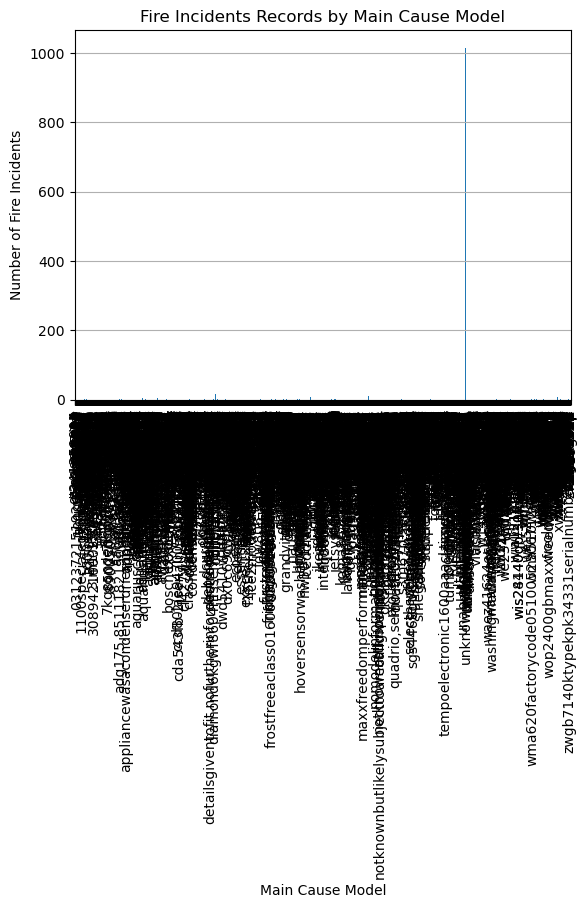

In [48]:
# Counting fire incidents for Main Cause Model
fire_incidents_count = df['MainCauseModel'].value_counts().sort_index()

# Plotting the bar chart
fire_incidents_count.plot(kind='bar')
plt.title('Fire Incidents Records by Main Cause Model')
plt.xlabel('Main Cause Model')
plt.ylabel('Number of Fire Incidents')
plt.grid(axis='y')  # Show grid lines only on y-axis
plt.show()

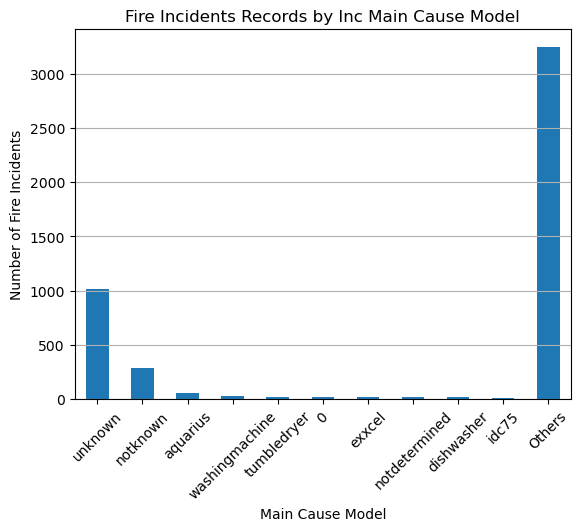

In [49]:
# Counting fire incidents for Main Cause Model
fire_incidents_count = df['MainCauseModel'].value_counts().sort_values(ascending=False)

# Number of top categories to display
top_n = 10

# Selecting top N categories and grouping others
top_categories = fire_incidents_count.head(top_n)
others_count = fire_incidents_count.iloc[top_n:].sum()

# Adding 'Others' category
top_categories['Others'] = others_count

# Plotting the bar chart
top_categories.plot(kind='bar')
plt.title('Fire Incidents Records by Inc Main Cause Model')
plt.xlabel('Main Cause Model')
plt.ylabel('Number of Fire Incidents')
plt.xticks(rotation=45)
plt.grid(axis='y')  # Show grid lines only on y-axis
plt.show()

## 9. Number of fire incidents by Inc Geo_Ward Name

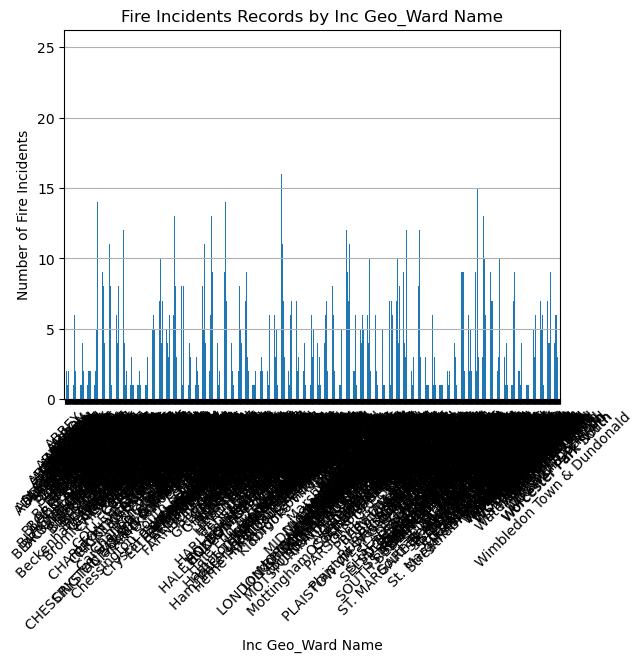

In [50]:
# Counting fire incidents for Inc Geo_Ward Name
fire_incidents_count = df['IncGeo_WardName'].value_counts().sort_index()

# Plotting the bar chart
fire_incidents_count.plot(kind='bar')
plt.title('Fire Incidents Records by Inc Geo_Ward Name')
plt.xlabel('Inc Geo_Ward Name')
plt.ylabel('Number of Fire Incidents')
plt.xticks(rotation=45)
plt.grid(axis='y')  # Show grid lines only on y-axis
plt.show()

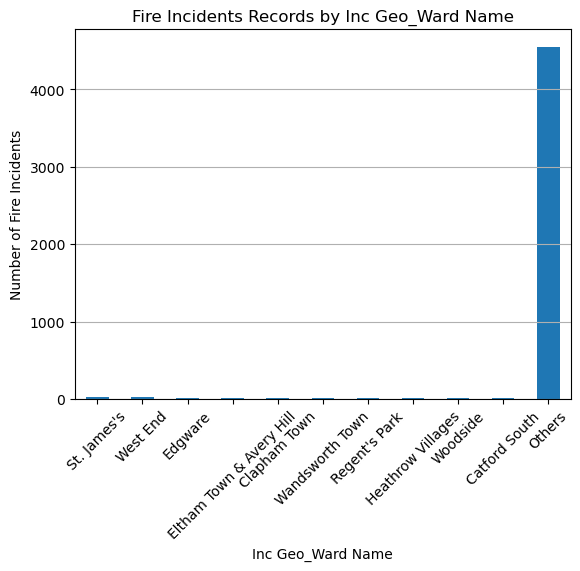

In [51]:
# Counting fire incidents for Inc Geo_Ward Name
fire_incidents_count = df['IncGeo_WardName'].value_counts().sort_values(ascending=False)

# Number of top categories to display
top_n = 10

# Selecting top N categories and grouping others
top_categories = fire_incidents_count.head(top_n)
others_count = fire_incidents_count.iloc[top_n:].sum()

# Adding 'Others' category
top_categories['Others'] = others_count

# Plotting the bar chart
top_categories.plot(kind='bar')
plt.title('Fire Incidents Records by Inc Geo_Ward Name')
plt.xlabel('Inc Geo_Ward Name')
plt.ylabel('Number of Fire Incidents')
plt.xticks(rotation=45)
plt.grid(axis='y')  # Show grid lines only on y-axis
plt.show()

# 6. Save the dataset

In [52]:
df.to_csv('preprocessed_data.csv', index=False)

# 7. Using Spark to Process and Query fire incident data

In [53]:
!pip install pyspark
import pyspark
from pyspark.sql import SparkSession

In [54]:
# Step 1: Create a SparkSession
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("Fire Incident Analysis") \
    .getOrCreate()

# Step 2: Load Data
df = spark.read.csv("White goods fires from 2009.csv", header=True, inferSchema=True)

# Step 3: Data Exploration
print("Schema:")
df.printSchema()

print("First few rows:")
df.show(5)

# Step 4: Data Processing (Example: Filtering out irrelevant columns)
relevant_columns = ['Year', 'NumFireDeaths', 'NumAllFireInjuries', 'IncGeo_BoroughName', 'IncGeo_WardName', 'IgnitionSourcePower', 'IgnitionSource', 'LocationFireStarted','ApplianceManufacturer']
df_processed = df.select(*relevant_columns)

# Step 5: Data Querying
df_processed.createOrReplaceTempView("fire_incidents")
result = spark.sql("SELECT * FROM fire_incidents WHERE NumFireDeaths > 0 ORDER BY NumFireDeaths DESC")
print("Fire incidents with deaths:")
result.show()

result = spark.sql("SELECT * FROM fire_incidents WHERE NumAllFireInjuries > 0 ORDER BY NumAllFireInjuries DESC")
print("Fire incidents with Injuries:")
result.show()

result = spark.sql("SELECT * FROM fire_incidents WHERE NumFireDeaths > 0 AND NumAllFireInjuries > 0 ORDER BY NumFireDeaths DESC")
print("Fire incidents with deaths and injuries:")
result.show()

result = spark.sql("SELECT IncGeo_BoroughName, COUNT(*) AS incident_count FROM fire_incidents GROUP BY IncGeo_BoroughName ORDER BY incident_count DESC LIMIT 10")
print("Fire incidents with BoroughName:")
result.show()

result = spark.sql("SELECT Year, COUNT(*) AS incident_count FROM fire_incidents GROUP BY Year ORDER BY incident_count DESC LIMIT 10")
print("Fire incidents with Year:")
result.show()

result = spark.sql("SELECT * FROM fire_incidents WHERE IncGeo_BoroughName = 'BARNET' AND Year ='2018' ORDER BY LocationFireStarted ASC, ApplianceManufacturer ASC")
print("Fire incidents for Barnet in the year 2018:")
result.show()

# Step 6: Stop SparkSession
spark.stop()


Schema:
root
 |-- Year: integer (nullable = true)
 |-- Month: string (nullable = true)
 |-- IncType: string (nullable = true)
 |-- ParentPropertyType: string (nullable = true)
 |-- NumFireDeaths: integer (nullable = true)
 |-- NumAllFireInjuries: integer (nullable = true)
 |-- IncGeo_BoroughCode: string (nullable = true)
 |-- IncGeo_BoroughName: string (nullable = true)
 |-- IncGeo_WardCode: string (nullable = true)
 |-- IncGeo_WardName: string (nullable = true)
 |-- IgnitionSourcePower: string (nullable = true)
 |-- IgnitionSource: string (nullable = true)
 |-- ItemFirstIgnited: string (nullable = true)
 |-- LocationFireStarted: string (nullable = true)
 |-- ApplianceManufacturer: string (nullable = true)
 |-- ApplianceManufacturerOther: string (nullable = true)
 |-- MainCauseModel: string (nullable = true)

First few rows:
+----+-----+------------+--------------------+-------------+------------------+------------------+------------------+---------------+-------------------+----------

In [55]:
df_processed

DataFrame[Year: int, NumFireDeaths: int, NumAllFireInjuries: int, IncGeo_BoroughName: string, IncGeo_WardName: string, IgnitionSourcePower: string, IgnitionSource: string, LocationFireStarted: string, ApplianceManufacturer: string]

# IGNORE THIS SECTION AS IT IS NOT RELATED TO OUR PROCESSING -Finding Correlation using pandas

In [57]:
# Correlation Analysis (only for numeric columns)
numeric_cols = df.select_dtypes(include=['int', 'float']).columns
correlation_matrix = df[numeric_cols].corr()

AttributeError: 'DataFrame' object has no attribute 'select_dtypes'

In [58]:
# Data Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Fire Incidents Data")
plt.show()


NameError: name 'correlation_matrix' is not defined

<Figure size 1000x800 with 0 Axes>


Cross-Tabulation between Year and Num of Fire Deaths:
Year                                2009  2010  2011  2012  2013  2014  2015  \
IncGeo_BoroughName   NumFireDeaths                                             
BARKING AND DAGENHAM 0                 0     0     0     0     0     0     2   
BARNET               0                 0     0     0     0     0     0     7   
BEXLEY               0                 0     0     0     0     0     0     5   
BRENT                0                 0     0     0     0     0     0     6   
BROMLEY              0                 0     0     0     0     0     0     4   
...                                  ...   ...   ...   ...   ...   ...   ...   
WESTMINSTER          0                 0     0     0     0     0     0     8   
Waltham Forest       0                 8    10     9     4     9    11     7   
                     1                 0     0     0     0     0     1     0   
Wandsworth           0                12    11    17    12     9 

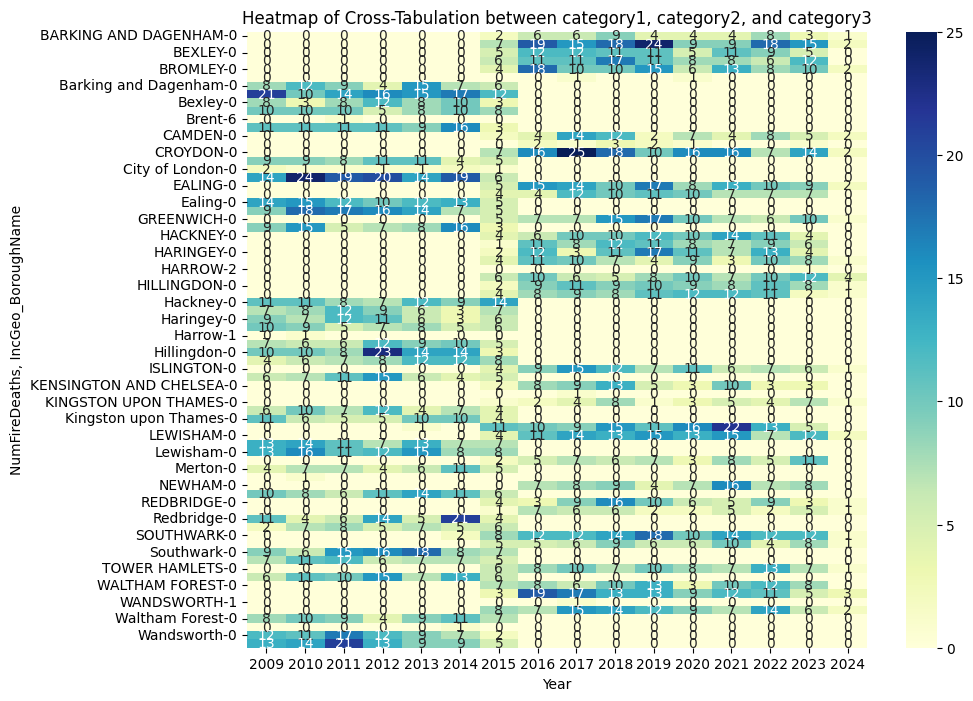

In [ ]:
# Stacked Bar Chart for category1 and category2
from scipy.stats import chi2_contingency

# Cross-Tabulation between category1 and category2
cross_tab_multi = pd.crosstab(index=[df['IncGeo_BoroughName'], df['NumFireDeaths']], columns=df['Year'])
print("\nCross-Tabulation between Year and Num of Fire Deaths:")
print(cross_tab_multi)

# Heatmap to visualize the cross-tabulation
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab_multi, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Heatmap of Cross-Tabulation between category1, category2, and category3')
plt.xlabel('Year')
plt.ylabel('NumFireDeaths, IncGeo_BoroughName')
plt.show()

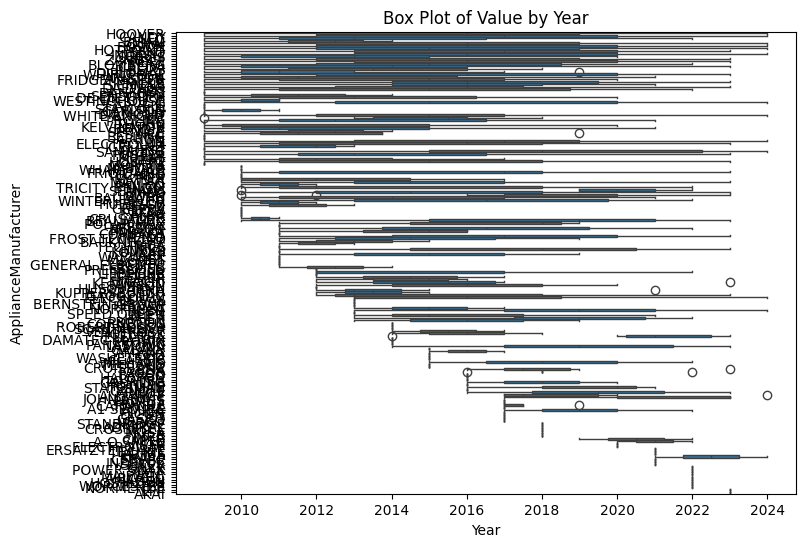

In [ ]:
# Visualization - Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Year', y='ApplianceManufacturer', data=df)
plt.title('Box Plot of Value by Year')
plt.xlabel('Year')
plt.ylabel('ApplianceManufacturer')
plt.show()